# Supervised Learning - Foundations Project: ReCell 

By:  Glen Patterson

Date:  5-5-2023

# Problem Statement

## Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- **brand_name:** Name of manufacturing brand
- **os:** OS on which the device runs
- **screen_size:** Size of the screen in cm
- **4g:** Whether 4G is available or not
- **5g:** Whether 5G is available or not
- **main_camera_mp:** Resolution of the rear camera in megapixels
- **selfie_camera_mp:** Resolution of the front camera in megapixels
- **int_memory:** Amount of internal memory (ROM) in GB
- **ram:** Amount of RAM in GB
- **battery:** Energy capacity of the device battery in mAh
- **weight:** Weight of the device in grams
- **release_year:** Year when the device model was released
- **days_used:** Number of days the used/refurbished device has been used
- **normalized_new_price:** Normalized price of a new device of the same model in euros
- **normalized_used_price:** Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [88]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# loading dataset as data
used_device = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "used_device" and call it "data".  We will be modifying this dataframe
data = used_device.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
# Observing the head of the first 10 rows of the dataset to make sure it loaded correctly and examine the data.
data.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


<IPython.core.display.Javascript object>

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

- We can see that there is 3,454 rows and 15 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

- There is missing data in this dataset
- There is 404.9KB memory used
- There is nine "float64", two "int64", and four "object" data types

In [8]:
# Explore the Statistics in data and look for outliers in dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

In [9]:
# Check the different types of values entered in dataset and there value counts
print(data.brand_name.value_counts())
print(data.os.value_counts())

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate analysis:

In [10]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observation on brand_name

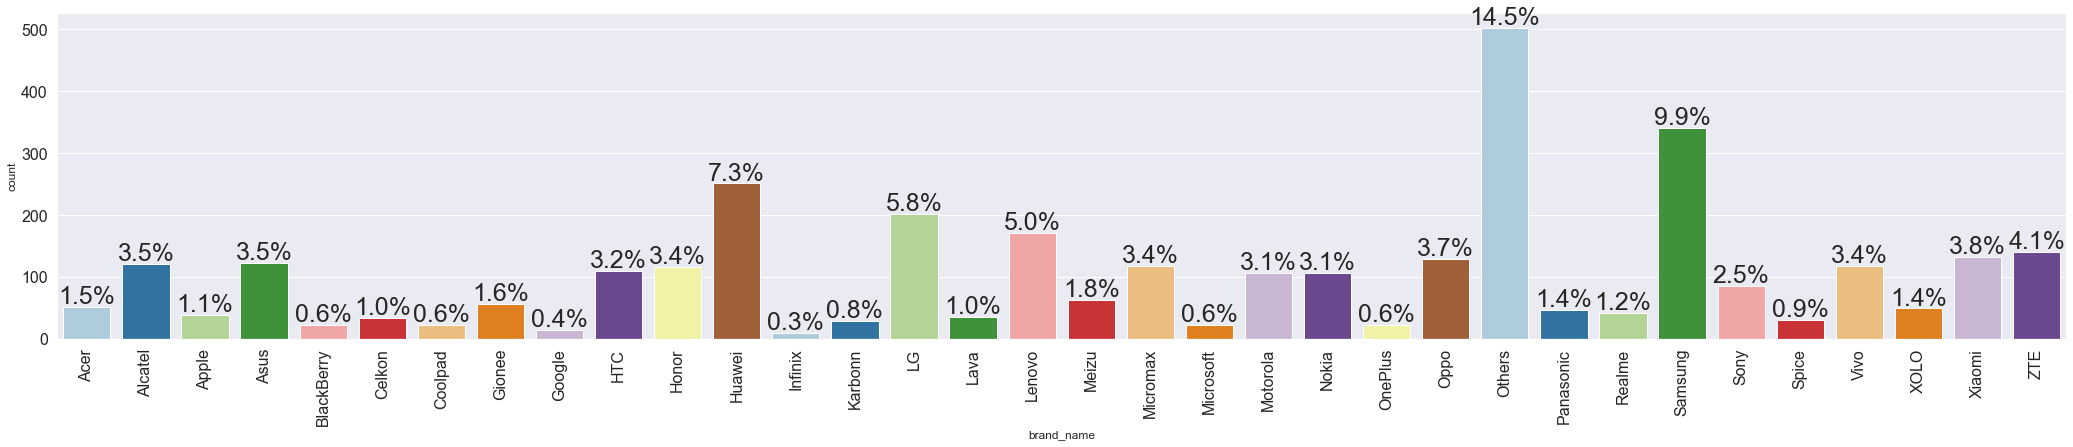

<IPython.core.display.Javascript object>

In [11]:
labeled_barplot(data, "brand_name", 1, perc=True)

- The most common brand name is Others (14.5%)
- 9.9% are Samsung, the second most common brand name
- 7.3% are Huawei, the third most common brand name
- 5.8% are LG, the fourth most common brand name

#### Observation on OS

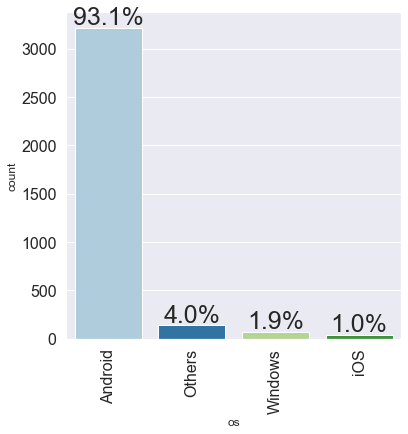

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(data, "os", 1, perc=True)

- 93.1% of the used phones are Android
- 4.0% of the used phones are Others
- 1.9% of the used phones are Windows
- 1.0% of the used phones are iOS

**2. What percentage of the used device market is dominated by Android devices?**

- **93.1% of the used phones are Android**

#### Observation on screen_size

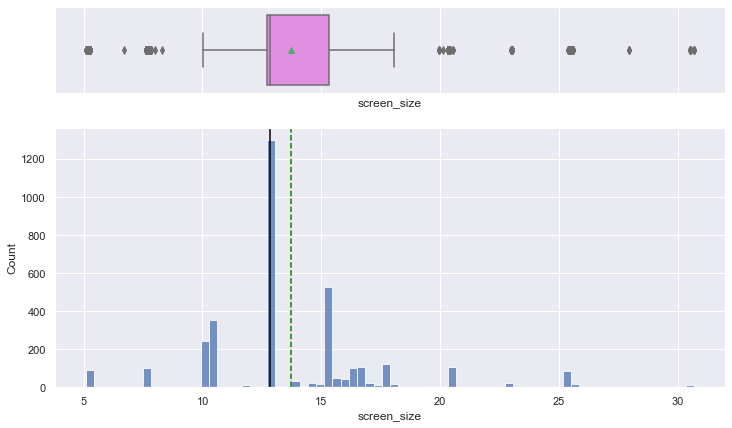

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "screen_size")

- The Median screen_size is 12.83cm, the smallest screen size is 5.08cm and the largest screen size is 30.71cm
- The IQR is between screen size 12.70cm and 15.34cm with a mean of 13.71cm
- There is some outliers in screen size

#### Observation on 4g

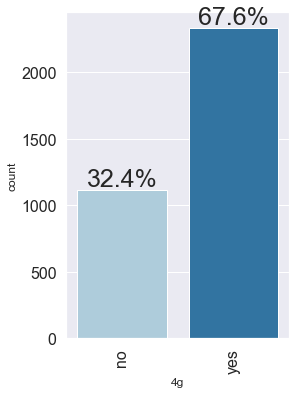

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data, "4g", 1, perc=True)

- 67.6% of the used phones are 4g
- 32.4% of the used phones are not 4g

#### Observation on 5g

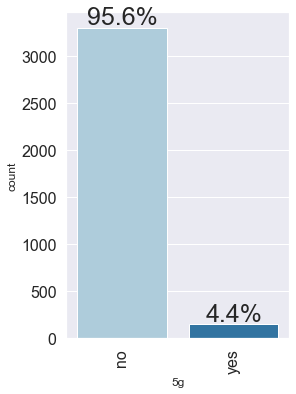

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "5g", 1, perc=True)

- 4.4% of the used phones are 5g
- 95.6% of the used phones are not 5g

#### Observation on main_camera_mp

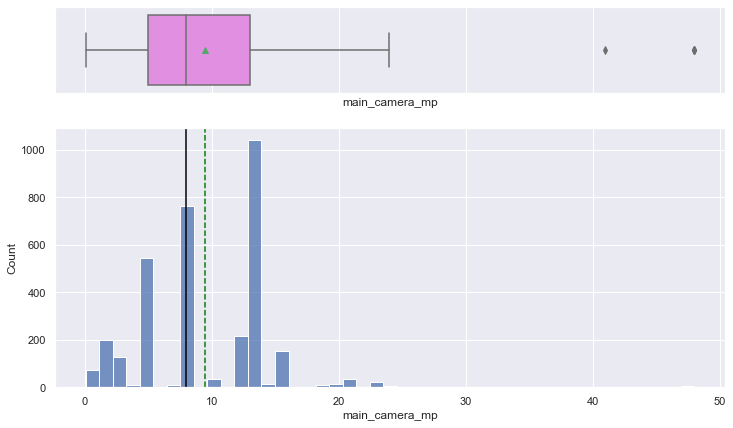

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "main_camera_mp")

- The Median main_camera_mp is 8.0 megapixels, the smallest main_camera_mp is 0.08 megapixels and the largest main_camera_mp is 48 megapixels.
- The IQR is between main_camera_mp 5.0 megapixels and 13 megapixels with a mean of 9.46 megapixels
- There is some outliers in main_camera_mp

#### Observation on selfie_camera_mp

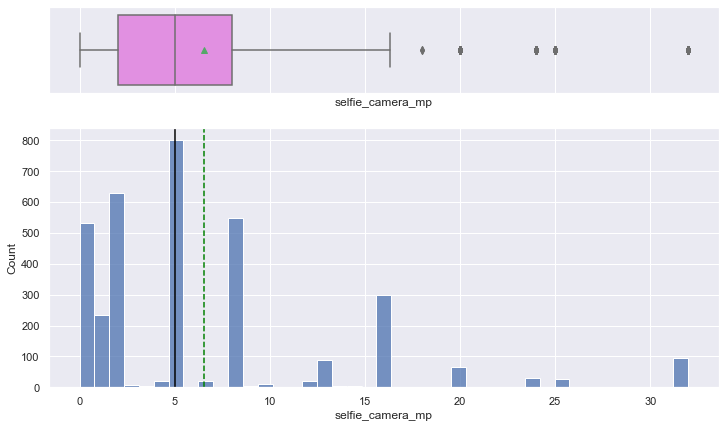

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "selfie_camera_mp")

- The Median selfie_camera_mp is 5.0 megapixels, the smallest selfie_camera_mp is 0 megapixels and the largest selfie_camera_mp is 32 megapixels.
- The IQR is between selfie_camera_mp 2 megapixels and 8 megapixels with a mean of 6.55 megapixels
- There is some outliers in selfie_camera_mp

#### Observation on int_memory

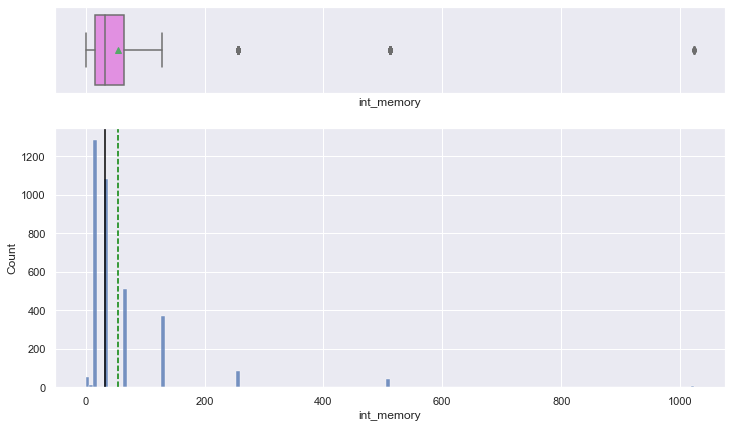

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "int_memory")

- The Median int_memory is 32GB, the smallest int_memory is 0.01GB and the largest int_memory is 1024GB.
- The IQR is between int_memory 16GB and 64GB with a mean of 54.57GB
- There is some outliers in int_memory

#### Observation on ram

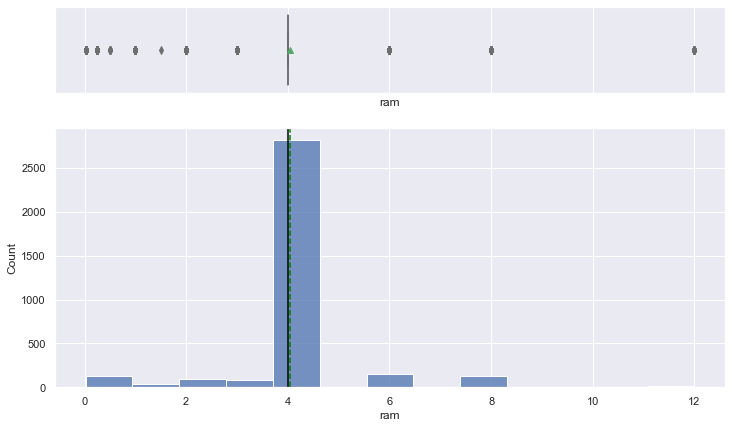

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "ram")

- The Median ram is 4GB, the smallest ram is 0.02GB and the largest ram is 12GB.
- The IQR is between ram 4GB and 4GB with a mean of 4.04GB
- There is some outliers in ram

#### Observation on battery

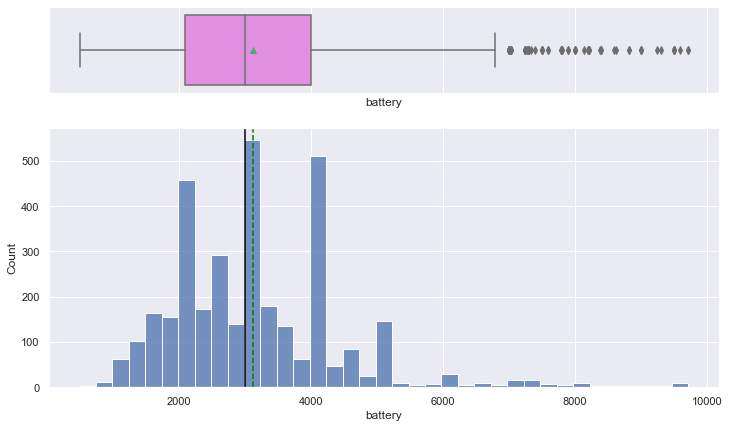

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "battery")

- The Median battery is 3000mAh, the smallest battery is 500mAh and the largest battery is 9720mAh
- The IQR is between batteries 2100mAh and 4000mAh with a mean of 3133mAh
- There is some outliers in battery

#### Observation on weight

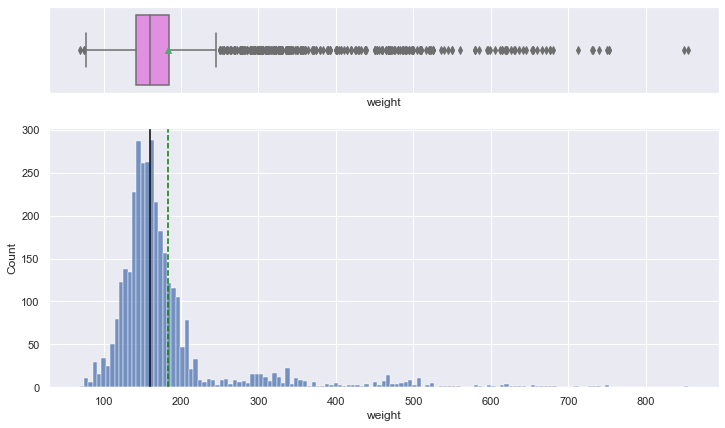

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "weight")

- The Median weight is 160 grams, the smallest weight is 69 grams and the largest weight is 855 grams
- The IQR is between weight 142 grams and 185 grams with a mean of 182.75 grams
- There is some outliers in weight

#### Observation on release_year

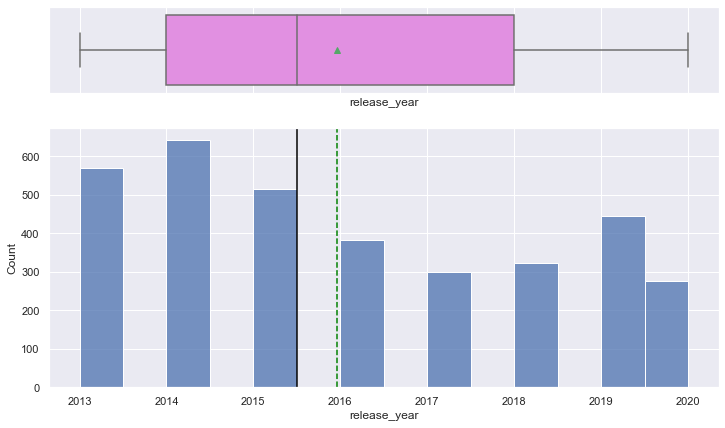

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "release_year")

- The Median release_year is 2015, the smallest release_year is 2013 and the largest release_year is 2020
- The IQR is between release_year 2014 and 2018 with a mean of 2016
- There is no outliers in release_year

#### Observation on days_used

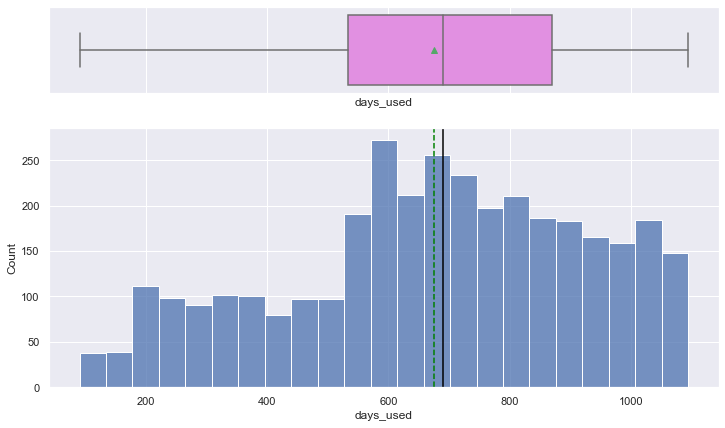

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "days_used")

- The Median days_used is 691, the smallest days_used is 91 and the largest days_used is 1094
- The IQR is between days_used 534 and 869 with a mean of 675
- There is no outliers in days_used

#### Observation on normalized_used_price

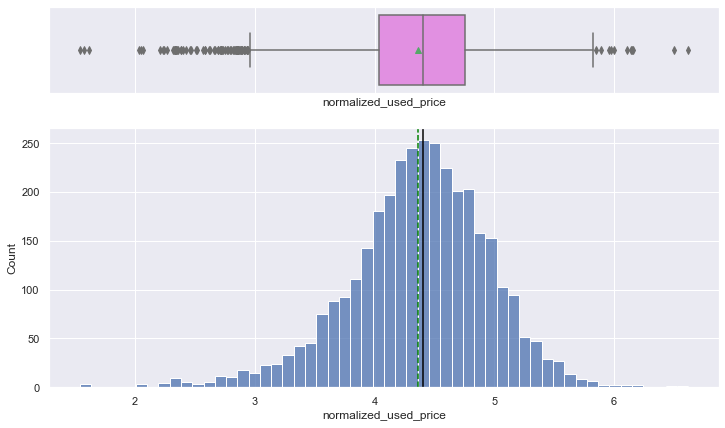

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "normalized_used_price")

- The normalized_used_price is close to normal distribution
- The Median normalized_used_price is 4.41 euros, the smallest normalized_used_price is 1.54 euros and the largest normalized_used_price is 6.62 euros
- The IQR is between normalized_used_price 4.03 euros and 4.76 euros with a mean of 4.36 euros
- There is some outliers in normalized_used_price

**1. What does the distribution of normalized used device prices look like?**

- **The normalized_used_price is close to normal distribution**

#### Observation on normalized_new_price

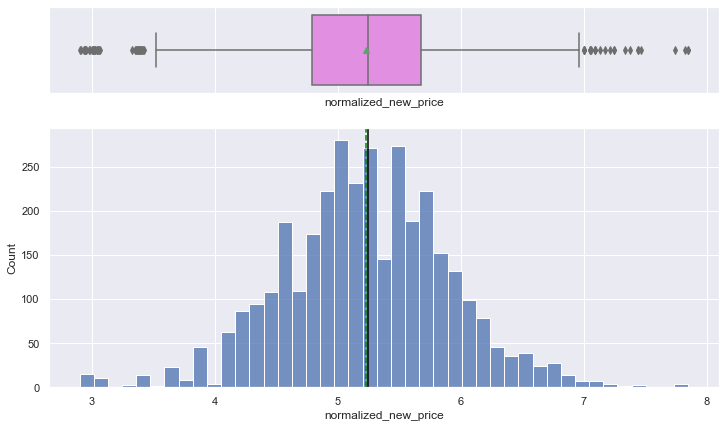

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "normalized_new_price")

- The normalized_new_price is close to normal distribution
- The Median normalized_new_price is 5.25 euros, the smallest normalized_new_price is 2.90 euros and the largest normalized_new_price is 7.85 euros
- The IQR is between normalized_new_price 4.79 euros and 5.67 euros with a mean of 5.23 euros
- There is some outliers in normalized_new_price

### Bivariate Analysis

In [26]:
# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot lineplot chart
def lineplot_chart(data_chart, x_axis, y_axis):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=data_chart, x=x_axis, y=y_axis)
    plt.show()


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

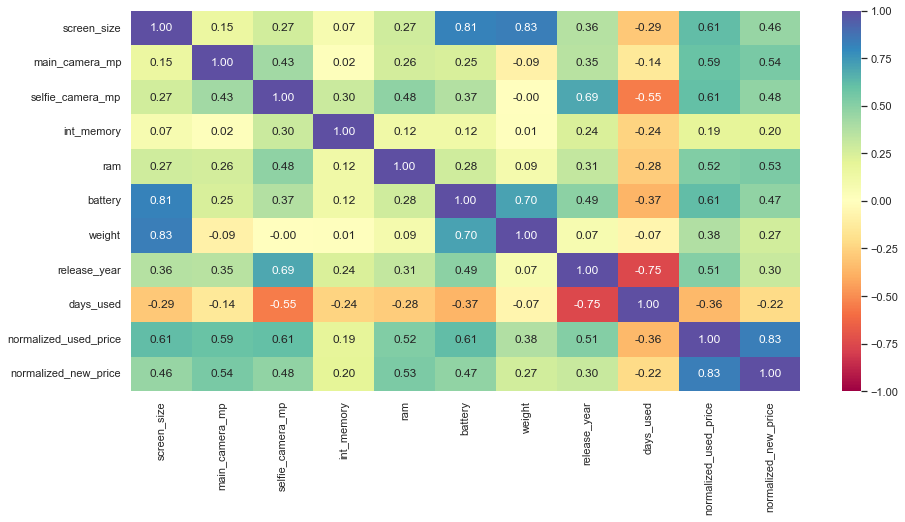

<IPython.core.display.Javascript object>

In [27]:
# Create Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a strong positive correlation between Weight and screen_size
- There is a strong positive correlation between Weight and Battery
- There is a strong positive correlation between Battery and screen_size
- There is a strong positive correlation between normalized_new_price and normalized_used_price
- There is a strong negitive correlation between released_year and days_used
- There is a positive correlation between selfie_camera_mp and release_year
- There is a positive correlation between selfie_camera_mp and normalized_used_price
- There is a positive correlation between main_camera_mp and normalized_used_price
- There is a positive correlation between screen_size and normalized_used_price
- There is a positive correlation between Battery and normalized_used_price
- There is a positive correlation between ram and normalized_used_price
- There is a positive correlation between release_year and normalized_used_price
- There is a positive correlation between ram and selfie_camera_mp
- There is a positive correlation between main_camera_mp and selfie_camera_mp
- There is a negitive correlation between days_used and selfie_camera_mp

**7. Which attributes are highly correlated with the normalized price of a used device?**

- screen_size
- main_camera_mp
- selfie_camera_mp
- ram
- battery
- release_year

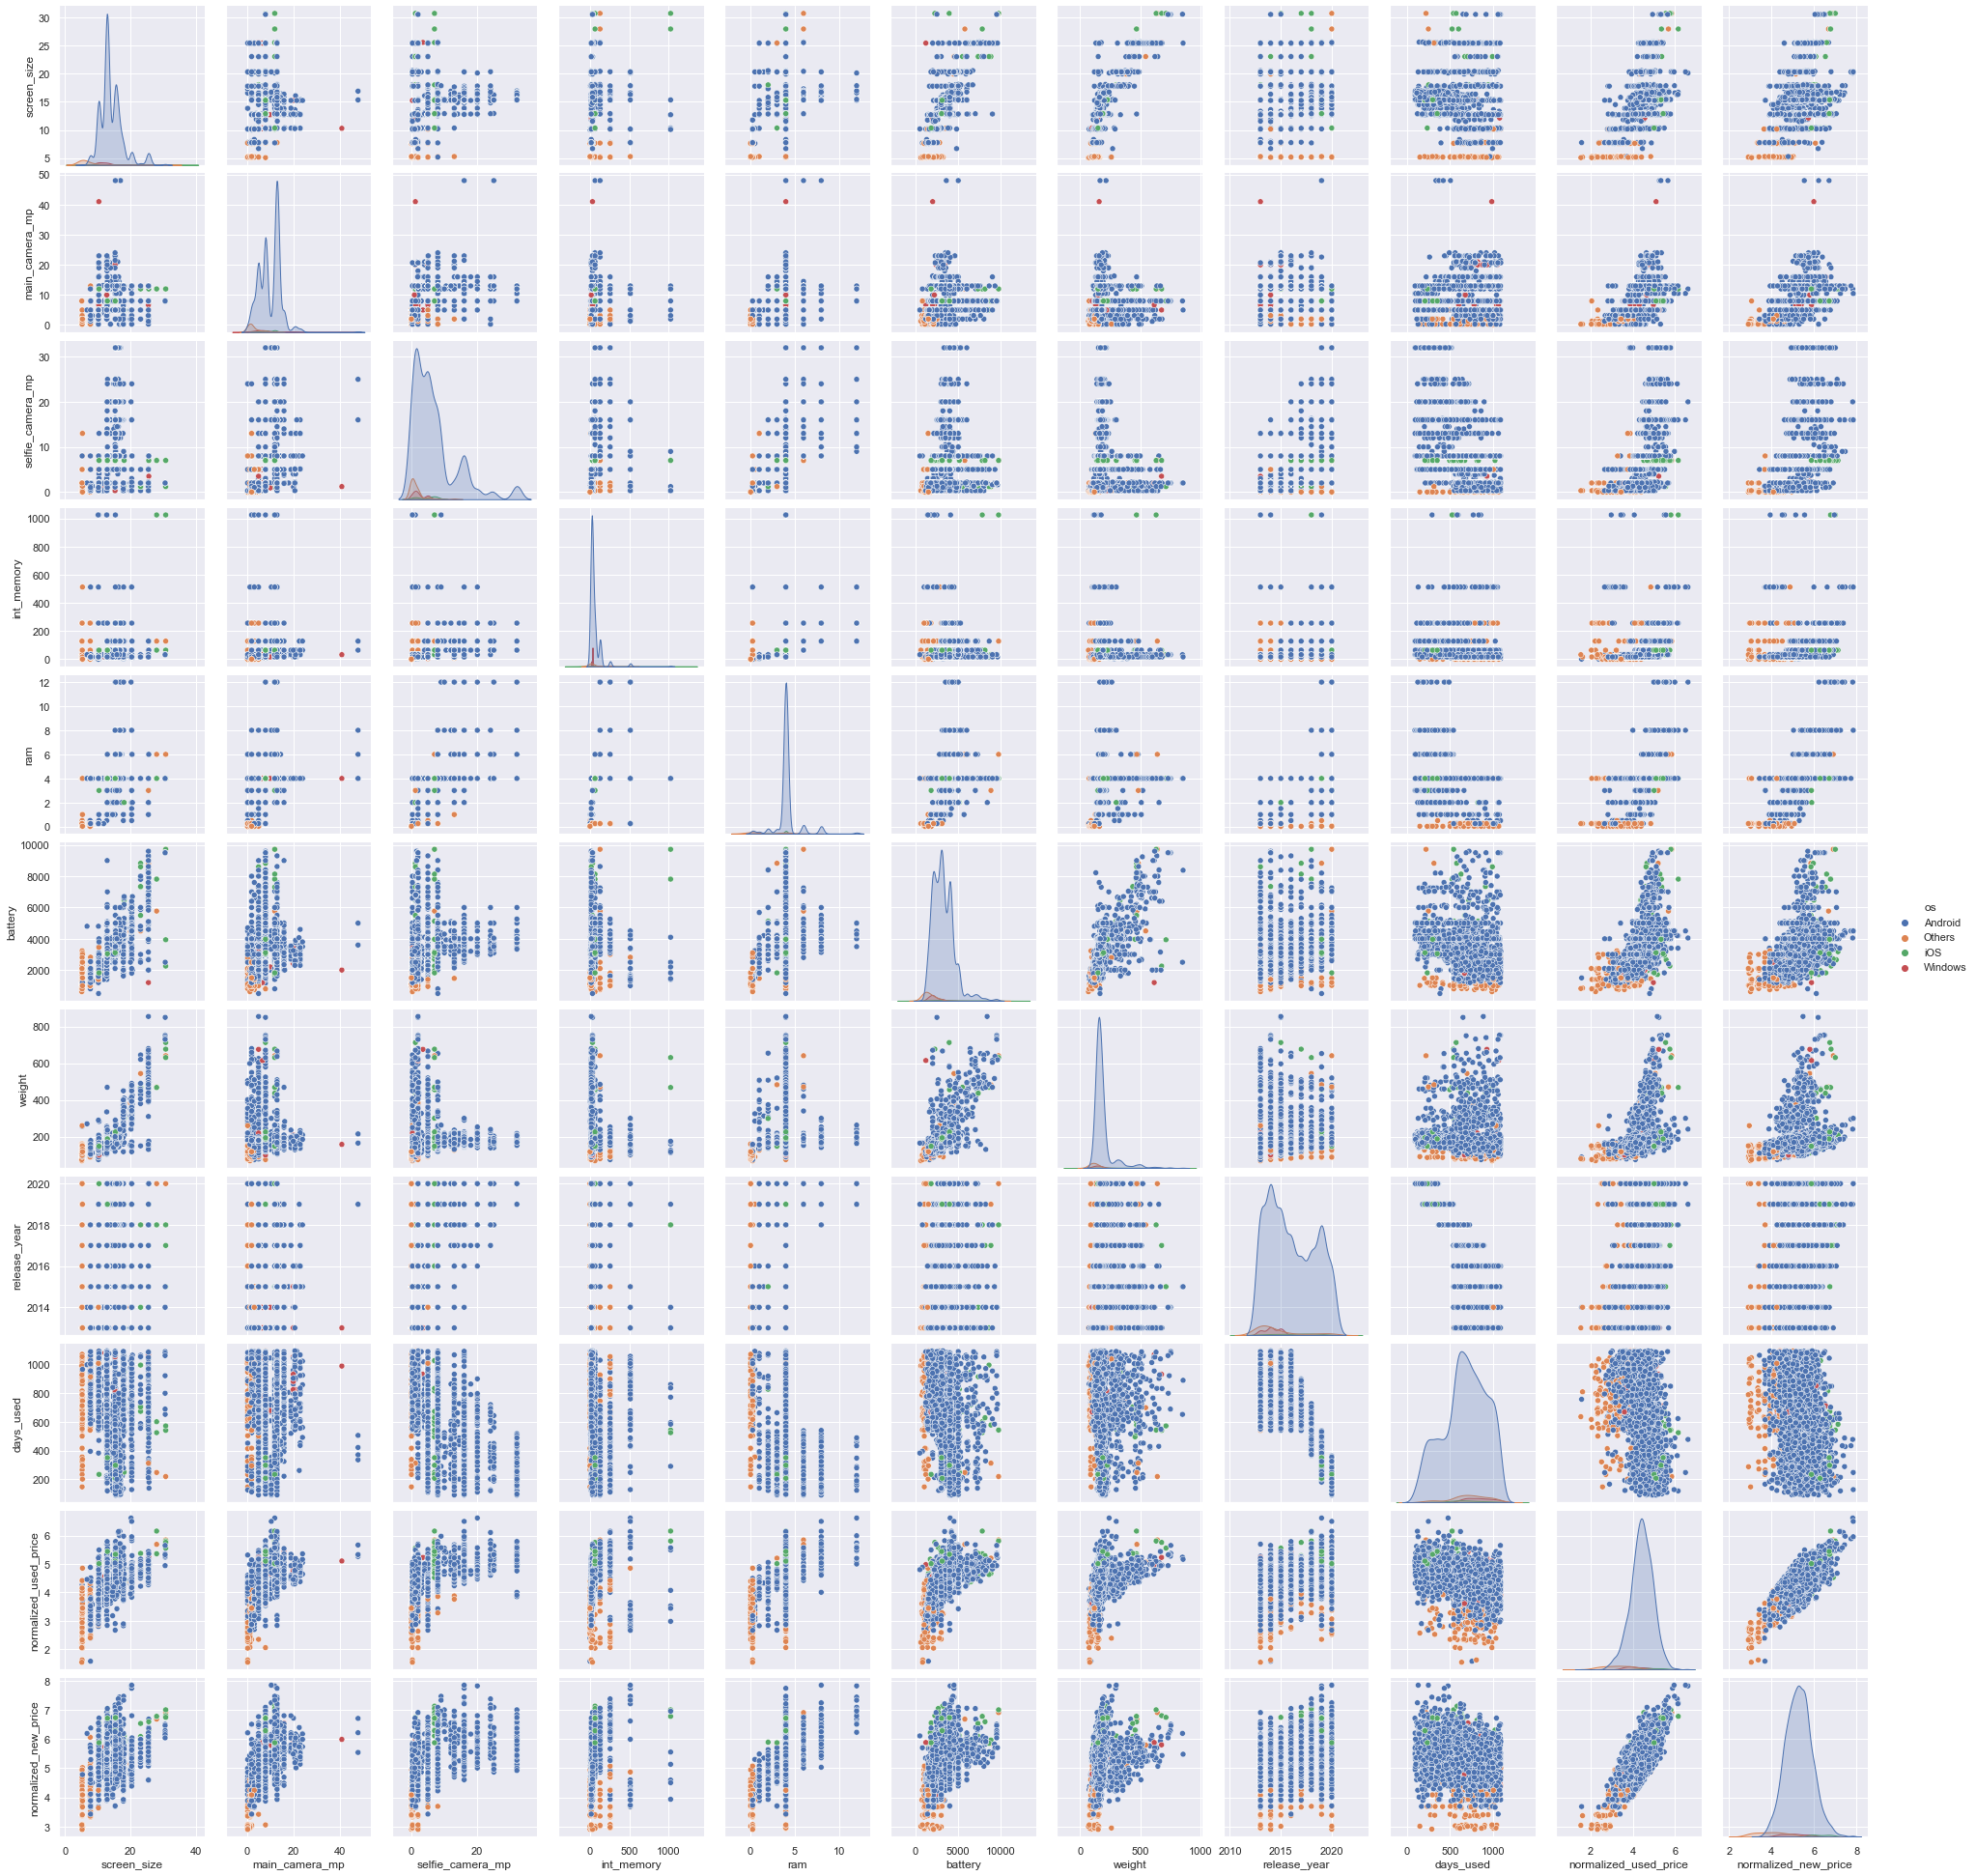

<IPython.core.display.Javascript object>

In [28]:
sns.pairplot(data, hue="os", diag_kind="kde")
plt.show()

**3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

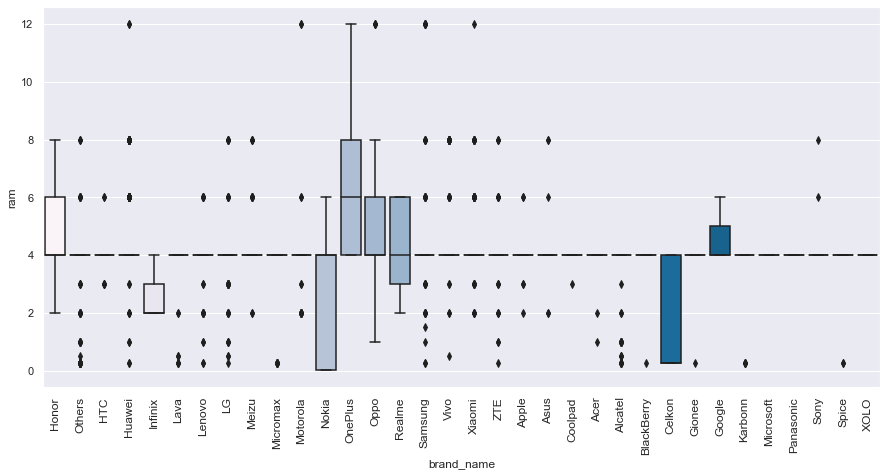

<IPython.core.display.Javascript object>

In [29]:
boxplot_chart(data, "brand_name", "ram", 90)

- **OnePlus has greater ram than most brands names on average**

**4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [30]:
# Create dataframe of only batteries larger than 4500
battery_size = data[data["battery"] > 4500]

<IPython.core.display.Javascript object>

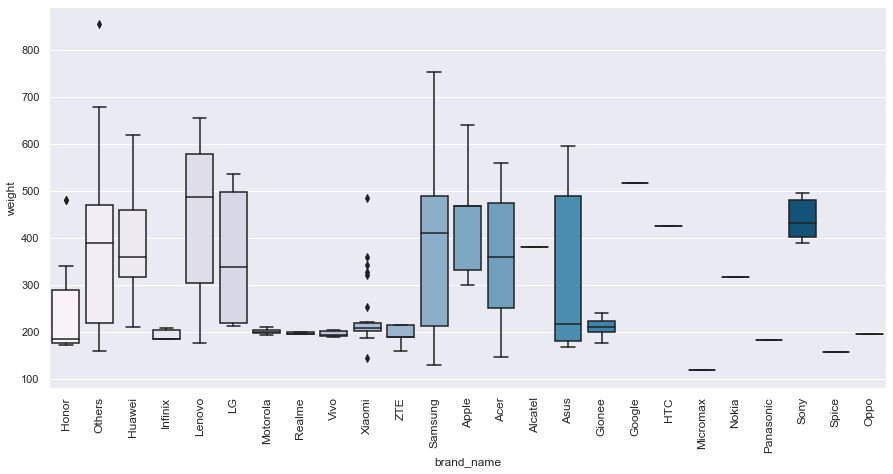

<IPython.core.display.Javascript object>

In [31]:
# Create boxplot for brand_name and weight
boxplot_chart(battery_size, "brand_name", "weight", 90)

- **Lenovo brand_name has higher weight on average for large battery phones 4500 mAh or larger**

**5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [32]:
# Create new dataframe for screen size 6 inches or larger (1 inch = 2.54cm)
Big_screen = data[data["screen_size"] > 6 * 2.54]

<IPython.core.display.Javascript object>

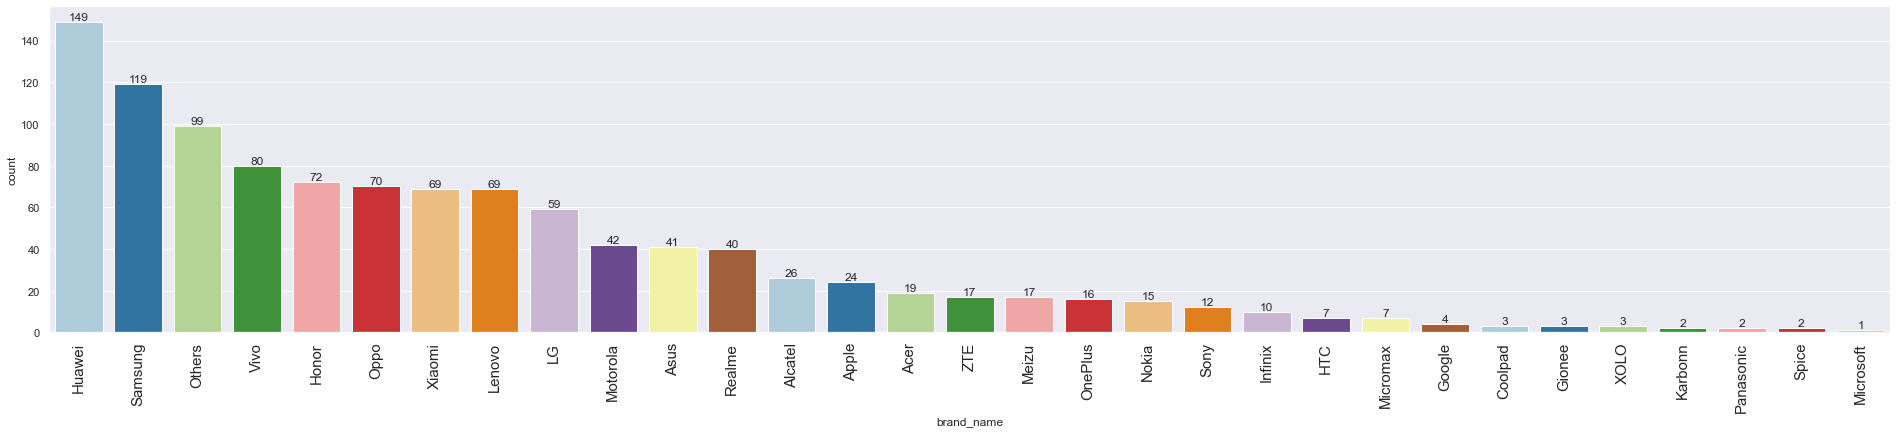

<IPython.core.display.Javascript object>

In [33]:
# Create barplot for brand names with bigger screen size (6 inches or larger)
labeled_barplot(Big_screen, "brand_name")

- **Huawei brand name has 149 phones available with screen size larger than 6 inches**
- **Samsung brand name has 119 phones available with screen size larger than 6 inches**

**6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [34]:
# Create new dataframe for high resolution selfie camera greater than 8MP
high_resolution_selfie_camera = data[data["selfie_camera_mp"] > 8]

<IPython.core.display.Javascript object>

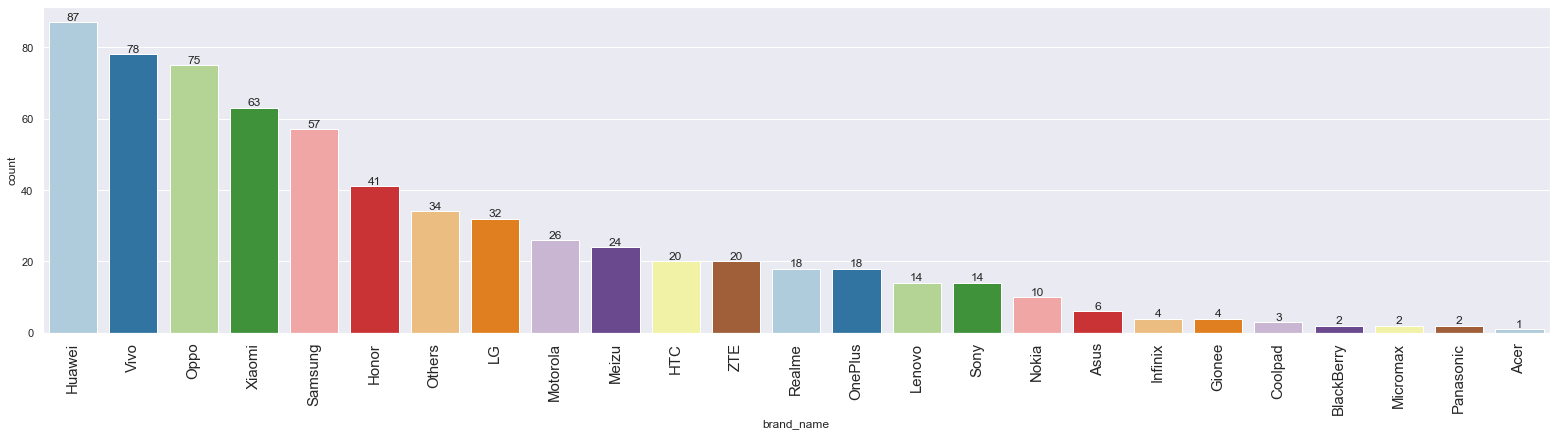

<IPython.core.display.Javascript object>

In [35]:
# Create barplot for brand names with devices offering greater than 8MP resolution selfie camera
labeled_barplot(high_resolution_selfie_camera, "brand_name")

- **Huawei brand devices have 87 high resolution selfie camera greater than 8MP available**

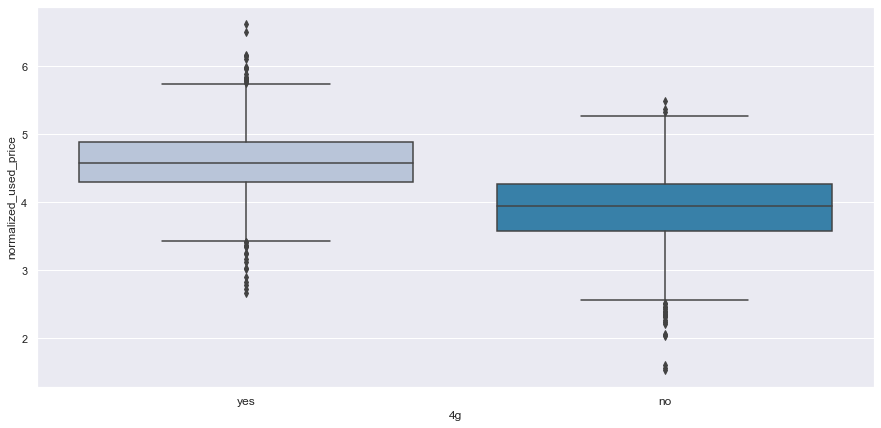

<IPython.core.display.Javascript object>

In [36]:
# Boxplot on how 4g effects prices
boxplot_chart(data, "4g", "normalized_used_price")

- **Used 4g devices sell at higher prices than devices without 4g**

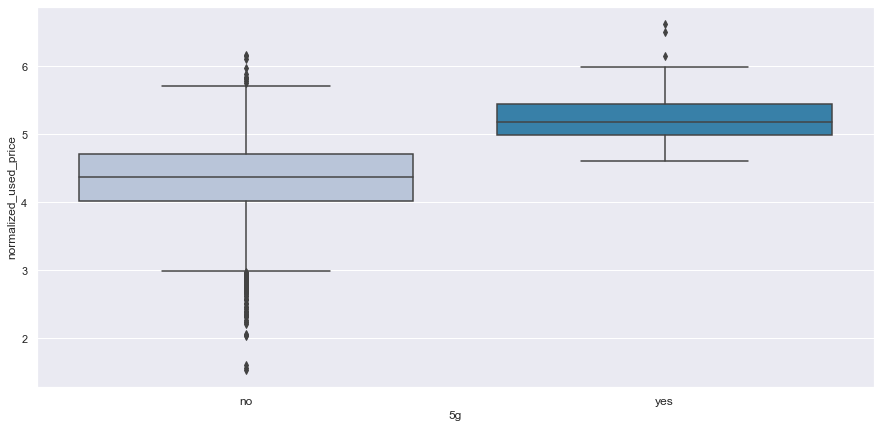

<IPython.core.display.Javascript object>

In [37]:
# Boxplot on how 5g effects prices
boxplot_chart(data, "5g", "normalized_used_price")

- **Used 5g devices sell at higher prices than devices without 5g**

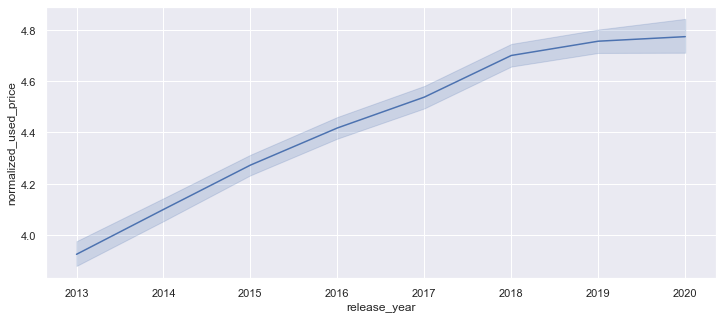

<IPython.core.display.Javascript object>

In [38]:
# Lineplot of normalized_used_price and release_year
lineplot_chart(data, "release_year", "normalized_used_price")

- **Used device prices go up as release_year increases**

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [39]:
# Making a copy of dataframe "data" and call it "df".  We will be modifying this dataframe
df = data.copy()

<IPython.core.display.Javascript object>

In [40]:
# Checking missing variables that we need to treat
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [41]:
# Columns with missing data that need to be imputed
columns_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# Loop each column with median that have simular release year and brand name
for col in columns_impute:
    df[col] = df[col].fillna(
        value=df.groupby(["release_year", "brand_name"])[col].transform("median")
    )

<IPython.core.display.Javascript object>

In [42]:
# Checking missing variables that we need to treat
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [43]:
# Columns with missing data that need to be imputed
columns_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

# Loop each column with median that have simular brand name
for col in columns_impute:
    df[col] = df[col].fillna(value=df.groupby(["brand_name"])[col].transform("median"))

<IPython.core.display.Javascript object>

In [44]:
# Checking missing variables that we need to treat
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

In [45]:
# Impute Median with remaining missing main_camera_mp data
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

<IPython.core.display.Javascript object>

In [46]:
# Checking missing variables that we need to treat
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [47]:
# Converting Objects data types to Category for the following columns
df["brand_name"] = df["brand_name"].astype("category")
df["os"] = df["os"].astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

<IPython.core.display.Javascript object>

In [48]:
# Information on dataset (data types, format, missing data, ect.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3454 non-null   float64 
 6   selfie_camera_mp       3454 non-null   float64 
 7   int_memory             3454 non-null   float64 
 8   ram                    3454 non-null   float64 
 9   battery                3454 non-null   float64 
 10  weight                 3454 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

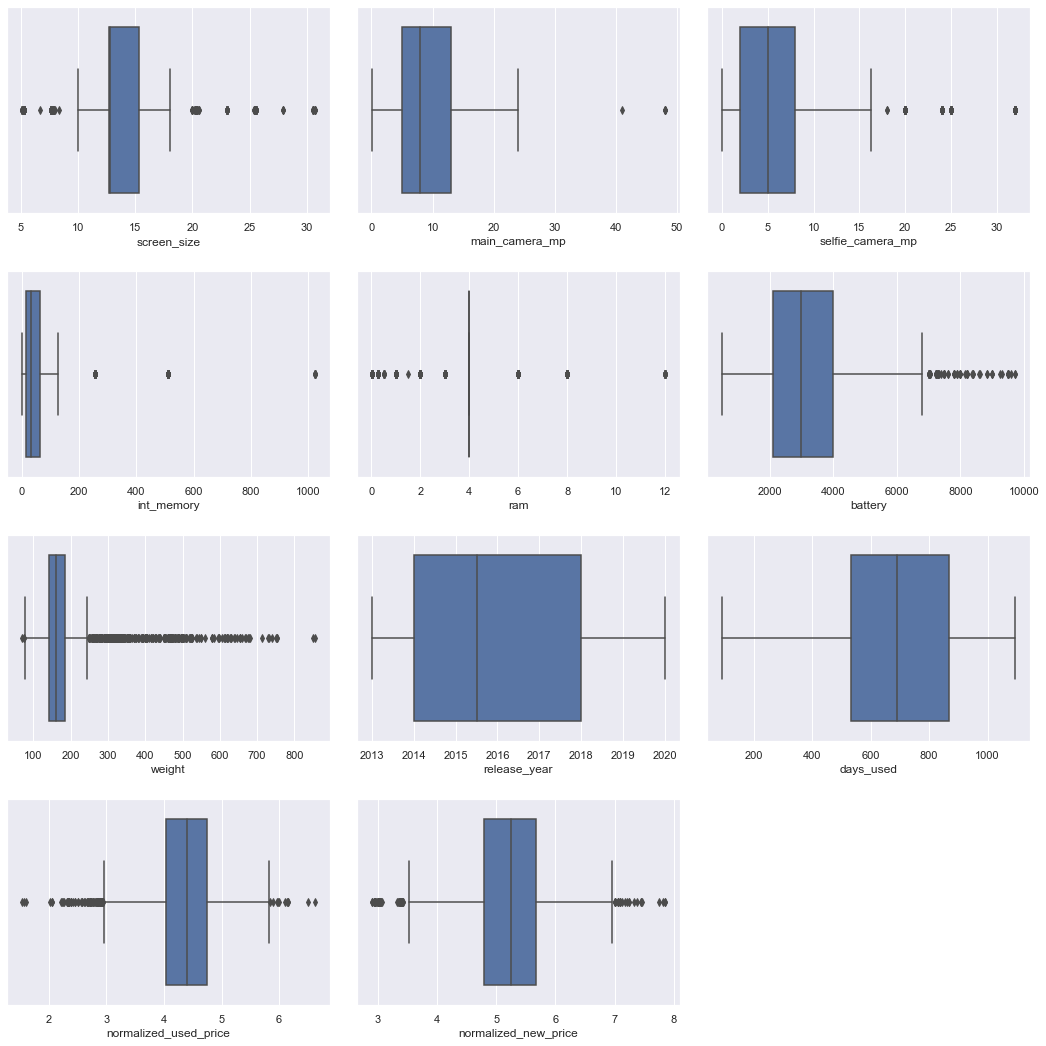

<IPython.core.display.Javascript object>

In [49]:
# EDA after imputed values
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- **Changes from the Imputed values did not change the shape of the boxplots compared to original dataset**
- **There is a few outliers in this dataset but not removing outliers because such a device can exist with given parameters**

In [50]:
# Create dummies for the category columns in the dataset
df = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

<IPython.core.display.Javascript object>

In [51]:
# Information on new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   main_camera_mp         3454 non-null   float64
 2   selfie_camera_mp       3454 non-null   float64
 3   int_memory             3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   battery                3454 non-null   float64
 6   weight                 3454 non-null   float64
 7   release_year           3454 non-null   int64  
 8   days_used              3454 non-null   int64  
 9   normalized_used_price  3454 non-null   float64
 10  normalized_new_price   3454 non-null   float64
 11  brand_name_Alcatel     3454 non-null   uint8  
 12  brand_name_Apple       3454 non-null   uint8  
 13  brand_name_Asus        3454 non-null   uint8  
 14  brand_name_BlackBerry  3454 non-null   uint8  
 15  bran

<IPython.core.display.Javascript object>

### Split Data

In [52]:
# Split into X=Predictor and Y=Predicted
X = df.drop("normalized_used_price", axis=1)
Y = df["normalized_used_price"]

<IPython.core.display.Javascript object>

In [53]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [54]:
# 70% Training and 30% Testing split on dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [56]:
olsmod1 = sm.OLS(y_train, x_train)
olsres1 = olsmod1.fit()

<IPython.core.display.Javascript object>

In [57]:
# let's print the regression summary
print(olsres1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                           12:55:46   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

## Model Performance Check

In [58]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [59]:
# Checking model performance on train set
print("Training Performance\n")
olsmod1_train_perf = model_performance_regression(olsres1, x_train, y_train)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


<IPython.core.display.Javascript object>

- **The R-squared value tells us that our model can explain 84.2% of the variance in the training set.**
- **Root-mean-square deviation (RMSE) of 0.23 is pretty low, so there is not much deviation from the residual to the ground truth.**

In [60]:
# Checking model performance on test set
print("Test Performance\n")
olsmod1_test_perf = model_performance_regression(olsres1, x_test, y_test)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


<IPython.core.display.Javascript object>

- **The R-squared value tells us that our model can explain 83.5% of the variance in the test set.**
- **Root-mean-square deviation (RMSE) of 0.24 is pretty low, so there is not much deviation from the residual to the ground truth.**

# Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Test for no Multicollinearity

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [61]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [63]:
# Checking the VIF of training dataset
checking_vif(x_train)

,feature,VIF
0,const,3.791593e+06
1,screen_size,7.677290e+00
2,main_camera_mp,2.285051e+00
3,selfie_camera_mp,2.812473e+00
4,int_memory,1.364152e+00
5,ram,2.282352e+00
6,battery,4.081780e+00
7,weight,6.396749e+00
8,release_year,4.899007e+00
9,days_used,2.660269e+00


<IPython.core.display.Javascript object>

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [70]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    r2 = []
    adj_r2 = []
    r2_minus_adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [74]:
col_list = [
    "screen_size",
    "weight",
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_iOS",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,os_iOS,0.841795,0.232211
4,brand_name_Samsung,0.841774,0.232227
5,screen_size,0.838381,0.234703
6,weight,0.838071,0.234928


<IPython.core.display.Javascript object>

In [75]:
col_to_drop = "brand_name_Samsung"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Samsung


,feature,VIF
0,const,3.791584e+06
1,screen_size,7.660546e+00
2,main_camera_mp,2.284727e+00
3,selfie_camera_mp,2.812242e+00
4,int_memory,1.364076e+00
5,ram,2.282206e+00
6,battery,4.080423e+00
7,weight,6.394603e+00
8,release_year,4.898869e+00
9,days_used,2.659930e+00


<IPython.core.display.Javascript object>

In [77]:
col_list = ["screen_size", "weight", "brand_name_Apple", "os_iOS"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841838,0.232179
1,os_iOS,0.841826,0.232188
2,screen_size,0.838374,0.234708
3,weight,0.838116,0.234896


<IPython.core.display.Javascript object>

In [78]:
col_to_drop = "os_iOS"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,3.790395e+06
1,screen_size,7.591346e+00
2,main_camera_mp,2.282024e+00
3,selfie_camera_mp,2.801906e+00
4,int_memory,1.364075e+00
5,ram,2.266612e+00
6,battery,4.076538e+00
7,weight,6.376188e+00
8,release_year,4.897435e+00
9,days_used,2.659655e+00


<IPython.core.display.Javascript object>

In [79]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838355,0.234722
1,weight,0.838184,0.234846


<IPython.core.display.Javascript object>

In [80]:
col_to_drop = "screen_size"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.659414e+06
1,main_camera_mp,2.278076e+00
2,selfie_camera_mp,2.799387e+00
3,int_memory,1.361912e+00
4,ram,2.266494e+00
5,battery,3.830877e+00
6,weight,2.990682e+00
7,release_year,4.724295e+00
8,days_used,2.648031e+00
9,normalized_new_price,3.066509e+00


<IPython.core.display.Javascript object>

- **None of the variables now show moderate or high multicollinearity.**

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [81]:
# initial list of columns
cols = x_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train4[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [83]:
x_train5 = x_train4[selected_features]
x_test5 = x_test4[selected_features]

<IPython.core.display.Javascript object>

In [96]:
# Create the model2
olsmod2 = sm.OLS(y_train, x_train5)
olsres2 = olsmod2.fit()

<IPython.core.display.Javascript object>

In [97]:
# let's print the regression summary
print(olsres2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     963.8
Date:                   Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                           16:19:33   Log-Likelihood:                 79.355
No. Observations:                   2417   AIC:                            -130.7
Df Residuals:                       2403   BIC:                            -49.65
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [99]:
# Checking model performance on train set
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsres2, x_train5, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234155,0.183209,0.839068,0.83813,4.403751


<IPython.core.display.Javascript object>

- **The R-squared value tells us that our model can explain 83.8% of the variance in the training set.**
- **Root-mean-square deviation (RMSE) of 0.23 is pretty low, so there is not much deviation from the residual to the ground truth.**

In [100]:
# Checking model performance on test set
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsres2, x_test5, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241449,0.187668,0.838367,0.836153,4.574103


<IPython.core.display.Javascript object>

- **The R-squared value tells us that our model can explain 83.6% of the variance in the test set.**
- **Root-mean-square deviation (RMSE) of 0.24 is pretty low, so there is not much deviation from the residual to the ground truth.**

### Observations

- **Dropping the high p-value predictor variables has not adversely affected the model performance.**
- **This shows that these variables do not significantly impact the target variable.**

## TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [85]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.860073,0.227414
1525,4.448399,4.640755,-0.192356
1128,4.315353,4.279927,0.035425
3003,4.282068,4.182851,0.099217
2907,4.456438,4.485538,-0.029100


<IPython.core.display.Javascript object>

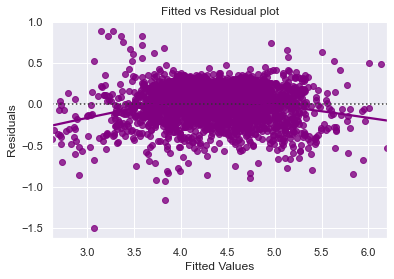

<IPython.core.display.Javascript object>

In [86]:
# let's plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Observations

- **We see no pattern in the plot above.**
- **Hence, the assumptions of linearity and independence are satisfied.**

## TEST FOR NORMALITY

We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

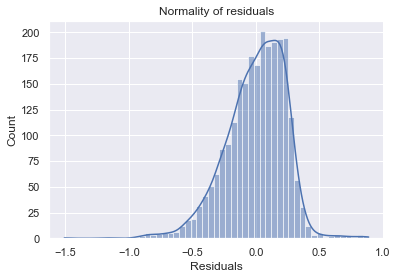

<IPython.core.display.Javascript object>

In [87]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

### Observations

- **The histogram of residuals almost has a bell shape structure.**
- **Let's check the Q-Q plot.**

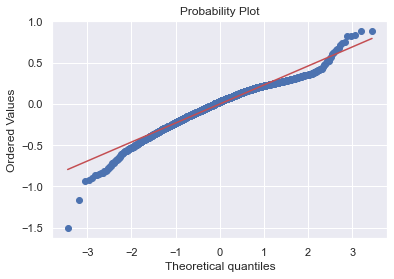

<IPython.core.display.Javascript object>

In [89]:
# Checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

### Observations

- **The residuals almost follow a straight line.**
- **Let's check the results of the Shapiro-Wilk test.**

In [90]:
# Checking the Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9681875109672546, pvalue=1.0292807180188988e-22)

<IPython.core.display.Javascript object>

### Observations

- **Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.**
- **However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.**
- **So, the assumption is satisfied.**

## TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [92]:
# Testing for homoscedasticity using the goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5)
lzip(name, test)

[('F statistic', 1.0180047241439623), ('p-value', 0.37892339465274955)]

<IPython.core.display.Javascript object>

### Observations

- **Since p-value > 0.05, the residuals are homoscedastic.**
- **So, the assumption is satisfied.**

### All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.

# Final Model

In [101]:
# Create the final model
olsmod_final = sm.OLS(y_train, x_train5).fit()
print(olsmod_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     963.8
Date:                   Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                           16:25:16   Log-Likelihood:                 79.355
No. Observations:                   2417   AIC:                            -130.7
Df Residuals:                       2403   BIC:                            -49.65
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [104]:
# Checking model performance on train set
print("Final Training Performance\n")
olsmod_final_train_perf = model_performance_regression(olsmod_final, x_train5, y_train)
olsmod_final_train_perf

Final Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234155,0.183209,0.839068,0.83813,4.403751


<IPython.core.display.Javascript object>

- **The R-squared value tells us that our model can explain 83.9% of the variance in the training set.**
- **Root-mean-square deviation (RMSE) of 0.23 is pretty low, so there is not much deviation from the residual to the ground truth.**

In [105]:
# Checking model performance on test set
print("Final Test Performance\n")
olsmod_final_test_perf = model_performance_regression(olsmod_final, x_test5, y_test)
olsmod_final_test_perf

Final Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241449,0.187668,0.838367,0.836153,4.574103


<IPython.core.display.Javascript object>

- **The R-squared value tells us that our model can explain 83.6% of the variance in the test set.**
- **Root-mean-square deviation (RMSE) of 0.24 is pretty low, so there is not much deviation from the residual to the ground truth.**

## Actionable Insights and Recommendations 

- A unit increase in normalized new price increases the median device used price by 0.4338 units, all other variables held constant.
- A device that has 4g increases the median device used price by 0.046 units, all other variables held constant.
- A year increases in the device release date increases the median device used price by 0.0290 units, all other variables held constant.
- A unit increase in ram increases the median device used price by 0.0212 units, all other variables held constant.
- A unit increase in main camera mp increases the median device used price by 0.0212 units, all other variables held constant.
- A unit increase in selfie camera mp increases the median device used price by 0.0143 units, all other variables held constant.
- Normalized new price is the most important factor in determining device used prices.
- The R-squared value in final model tells us that our model can explain 83.6% of the variance in the unseen data.
- Root-mean-square deviation (RMSE) of 0.24 is low, so our model does not have much error in finding device used prices.
- The final model has only 14 important variables compared to our first model that had 48 variables.
- Removing the variables not used in final model did not affect the R-squared value much at all.  Meaning those variables are not important.
- The most important deviation on used devices prices is the condition the device is in (function, battery life, ports, scratches, etc).  
- There was no data on the condition of this devices for further analysis.  
- I recommend that the business starts collecting this data in the future.  It can help predicting the price of the used devices.